# **5.Exploring Binary and Categorical Data**

# 5.1 Exploring Categorical Data

Such variables take on a fixed and limited number of possible values. For example – grades, gender, blood group type, etc. Also, in the case of categorical variables, the logical order is not the same as categorical data e.g. “one”, “two”, “three”. But the sorting of these variables uses logical order

## Types of Categorical Data 

### 1.Nominal data 

Nominal data is sometimes called “labelled” or “named” data. Examples of nominal data include name, hair colour, sex etc. 

### 2.Ordinal Data
This is a data type with a set order or scale to it. However, this order does not have a standard scale on which the difference in variables in each scale is measured. 

# 5.2.Why do we need encoding?

Most machine learning algorithms cannot handle categorical variables unless we convert them to numerical values
Many algorithm’s performances even vary based upon how the categorical variables are encoded
In this blog we will explore and implement:
 
1. One-hot Encoding using:

 * Python’s category_encoding library
 * Scikit-learn preprocessing
 * Pandas' get_dummies

2. Binary Encoding

3. Frequency Encoding
4. Label Encoding
5. Ordinal Encoding

In [ ]:
import pandas as pd
import sklearn

pip install category_encoders

import category_encoders as ce

In [ ]:
data = pd.DataFrame({ 'gender' : ['Male', 'Female', 'Male', 'Female', 'Female'],
                       'class' : ['A','B','C','D','A'],
                        'city' : ['Delhi','Gurugram','Delhi','Delhi','Gurugram'] })
data.head()

## Method1:category_encoder

### One-Hot Encoding 


In this method, each category is mapped to a vector that contains 1 and 0 denoting the presence or absence of the feature. The number of vectors depends on the number of categories for features.



In [ ]:
ce_OHE = ce.OneHotEncoder(cols=['gender','city'])

data1 = ce_OHE.fit_transform(data)
data1.head()

### Binary Encoding
Binary encoding converts a category into binary digits. Each binary digit creates one feature column.

In [ ]:
ce_be = ce.BinaryEncoder(cols=['class']);

# transform the data
data_binary = ce_be.fit_transform(data["class"]);
data_binary

## Method 2: Using Pandas' get dummies

In [ ]:
pd.get_dummies(data,columns=["gender","city"])

In [ ]:
#We can assign a prefix if we want to, if we do not want the encoding to use the default.
pd.get_dummies(data,prefix=["gen","city"],columns=["gender","city"])

## Method 3: Using Scikit-learn
 
Scikit-learn also has 15 different types of built-in encoders, which can be accessed from sklearn.preprocessing.

### Scikit-learn One-hot Encoding
 
Let's first get the list of categorical variables from our data:

In [ ]:
s = (data.dtypes == 'object')
cols = list(s[s].index)

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)

In [ ]:
#gender column:
data_gender = pd.DataFrame(ohe.fit_transform(data[["gender"]]))

data_gender

In [ ]:
#city column:
data_city = pd.DataFrame(ohe.fit_transform(data[["city"]]))

data_city

In [ ]:
#class column:
data_class = pd.DataFrame(ohe.fit_transform(data[["class"]]))

data_class

In [ ]:
#applying to the list of categorical variables:
data_cols = pd.DataFrame(ohe.fit_transform(data[cols]))

data_cols

### Scikit-learn Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Label encoder takes no arguments
le_class = le.fit_transform(data[["class"]])

## Ordinal Encoding
 
Ordinal encoding’s encoded variables retain the ordinal (ordered) nature of the variable. It looks similar to label encoding, the only difference being that label coding doesn't consider whether a variable is ordinal or not; it will then assign a sequence of integers.

**Example: **
Ordinal encoding will assign values as Very Good(1) < Good(2) < Bad(3) < Worse(4)

First, we need to assign the original order of the variable through a dictionary.

In [ ]:
temp = {'temperature' :['very cold', 'cold', 'warm', 'hot', 'very hot']}
df=pd.DataFrame(temp,columns=["temperature"])
temp_dict = {'very cold': 1,'cold': 2,'warm': 3,'hot': 4,"very hot":5}
df

In [ ]:
#Then we can map each row for the variable as per the dictionary.
df["temp_ordinal"] = df.temperature.map(temp_dict)
df

## Frequency Encoding
 
The category is assigned as per the frequency of values in its total lot.

In [ ]:
ata_freq = pd.DataFrame({'class' : ['A','B','C','D','A',"B","E","E","D","C","C","C","E","A","A"]})

In [ ]:
#Grouping by class column:
fe = data_freq.groupby("class").size()

In [ ]:
#Dividing by length:
fe_ = fe/len(data_freq)

In [ ]:
#Mapping and rounding off:

data_freq["data_fe"] = data_freq["class"].map(fe_).round(2)
data_freq

# EXCERCISE-1:
Given the dataset for titanic.

In [ ]:
import pandas as pd
import numpy as np
Data = pd.read_csv("train.csv")
Data.isnull().sum()

## QUES1:
Create dummies or binary type columns for each category in the object/ category type feature.

In [ ]:
DataDummies = pd.get_dummies(Data)
DataDummies

## QUES2:
Implement Ordinal Number Encoding


SOLN:Implementation:

Step 1: Create a dictionary with key as category and values with its rank.

Step 2: Create a new column and map the ordinal column with the created dictionary.

Step 3: Drop the original column.

In [ ]:
# 1. 
PClassDict =   {   'First':1,
                    'Second':2,
                     'Third':3,              
                }
# 2. 
Data['Ordinal_Pclass'] = Data.Pclass.map(PClassDict)
# Display result
      
      Data[['PassengerId', 'Pclass', 'Ordinal_Pclass']].head(10)
# 3.
Data = Data.drop('Pclass', axis = 1)

## QUES3:

Replace each category with its frequency/number of time that category occurred in that column.

SOLN:Implementation:

Step 1. Create Dictionaries with key as category name and value with a count of categories i.e frequency of that category in each categorical column.

Step 2. Create a new column which acts as a weight for that category and map with its respective dictionary.

Step 3. Drop Orginal Columns.

In [ ]:
# 1.
Pclass_Dict = Data['Pclass'].value_counts()
Salutation_Dict = Data['Salutation'].value_counts()
Sex_Dict = Data['Sex'].value_counts()
Embarked_Dict = Data['Embarked'].value_counts()
Cabin_Serial_Dict = Data['Cabin_Serial'].value_counts()
Cabin_Dict = Data['Cabin'].value_counts()
# 2.
Data['Encoded_Pclass'] = Data['Pclass'].map(Pclass_Dict)
Data['Salutation_Dict'] = Data['Salutation'].map(Salutation_Dict)
Data['Sex_Dict'] = Data['Sex'].map(Sex_Dict)
Data['Embarked_Dict'] = Data['Embarked'].map(Embarked_Dict)
Data['Cabin_Serial_Dict'] = Data['Cabin_Serial'].map(Cabin_Serial_Dict)
Data['Cabin_Dict'] = Data['Cabin'].map(Cabin_Dict)
# Display Result
Data[['Pclass','Encoded_Pclass','Salutation','Salutation_Dict','Sex'       ,'Sex_Dict','Embarked','Embarked_Dict','Cabin_Serial','Cabin_Serial_Dict','Cabin','Cabin_Dict']].head(10)
# 3. 
Data = Data.drop(['Pclass','Salutation','Sex','Embarked','Cabin_Serial','Cabin'], axis = 1)

## QUES4:
Replace the category of the column with its depending join probability ranking with respect to Target column.


SOLN:
Step 1. Replace original cabin value with the first character of the cabin name.

Step 2. Calculate the joint probability of each category based on the target column value.

Step 3. Create a list with sorted index in ascending order of join probabilities.

Step 4. Create a dictionary where key as category name in cabin and values as joint probability ranking.

Step 5. Create a new column and map cabin values with dictionary joint probability ranking.

Step 6. Delete original cabin column.

In [ ]:
# 1.
Data['Cabin'] = Data['Cabin'].astype(str).str[0]
# 2.
Data.groupby(['Cabin'])['Survived'].mean()
# 3.
Encoded_Lables = Data.groupby(['Cabin'])  ['Survived'].mean().sort_values().index
# 4.
Encoded_Lables_Ranks = { k:i for i, k in enumerate(Encoded_Lables, 0) }
# 5.
Data['Cabin_Encoded'] = Data['Cabin'].map(Encoded_Lables_Ranks)
# 6.
Data = Data.drop('Cabin', axis = 1)

# **Mode**

Most frequently occurring value in the given data

# **Expected Value** 

 When working in machine learning, categories have to be associated with a numeric value, so as to give understanding to the machine. This gives an average value based on a category’s probability of occurrence i.e. Expected Value.
It is calculated by –

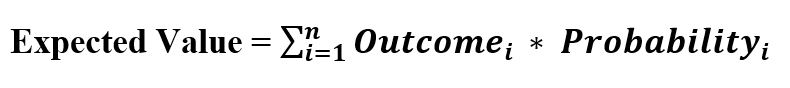

# BAR CHART

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

label = ['Car', 'Bike', 'Truck', 'Cycle', 'Jeeps', 'Amulance']
no_vehicle = [941, 854, 4595, 2125, 942, 509]

index = np.arange(len(label))
  
print ("Total Labels : ", len(label))
print ("Indexing : ", index)

plt.bar(index, no_vehicle)
plt.xlabel('Type', fontsize = 15)
plt.ylabel('No of Vehicles', fontsize = 15)
plt.xticks(index, label, fontsize = 10, rotation = 30)
plt.title('Market Share for Each Genre 1995-2017')

# PIE CHART

In [ ]:
plt.figure(figsize =(8, 8))
plt.pie(no_vehicle, labels = label, 
        startangle = 90, autopct ='%.1f %%')
plt.show()